```
         Copyright Rein Halbersma 2021.
Distributed under the Boost Software License, Version 1.0.
   (See accompanying file LICENSE_1_0.txt or copy at
         http://www.boost.org/LICENSE_1_0.txt)
```

# Dynamic Programming for Jack's Car Rental Environment

In [1]:
import gym
import numpy as np
import pandas as pd
import plotnine as p9

import gym_jcr

from doctrina.algorithms import dp

env = gym.make('JacksCarRentalEnv-v0')

## Adapt the environment

In [2]:
from gym_jcr.jcr_env import Ptrans, R
env.transition = Ptrans.transpose(1, 2, 0)
env.reward = R
env.nSp = env.nS

## Policy iteration

In [3]:
policy, V, info = dp.V_policy_iter(env, gamma=0.9)
print(info)

{'delta': 9.793780009204056e-09, 'evaluations': 821, 'improvements': 5}


## Optimal policy

In [4]:
df_policy = (pd
    .DataFrame((policy - 5).reshape(21, 21))
    .rename_axis('loc_1')
    .reset_index()
    .melt(id_vars='loc_1', var_name='loc_2', value_name='cars_moved')
    .astype({'loc_2': 'int64'})
)

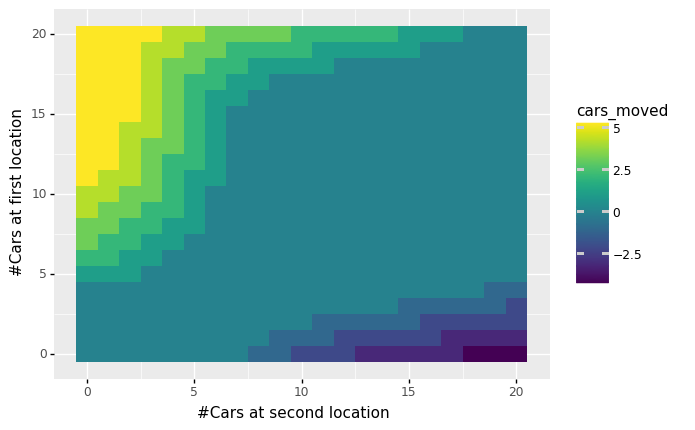

<ggplot: (8794019287269)>

In [5]:
(
    p9.ggplot(df_policy, p9.aes(x='loc_2', y='loc_1')) +
    p9.geom_tile(p9.aes(fill='cars_moved')) +
    p9.xlab('#Cars at second location') + p9.ylab('#Cars at first location')
)

## State value function

In [6]:
df_V = (pd
    .DataFrame(V.reshape(21, 21))
    .rename_axis('loc_1')
    .reset_index()
    .melt(id_vars='loc_1', var_name='loc_2', value_name='expected_value')
    .astype({'loc_2': 'int64'})
)

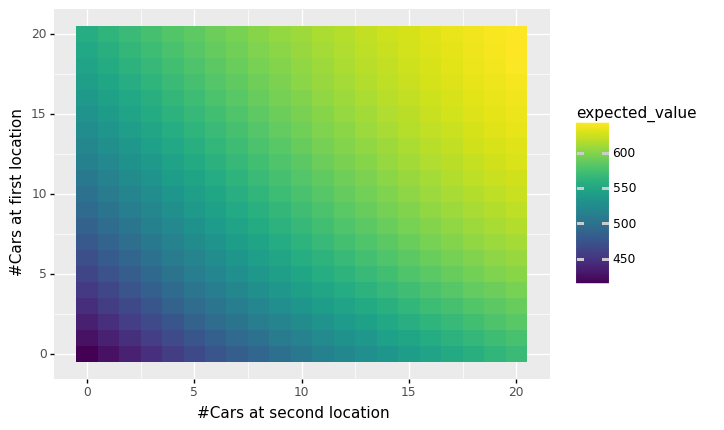

<ggplot: (8794160312887)>

In [7]:
(
    p9.ggplot(df_V, p9.aes(x='loc_2', y='loc_1')) +
    p9.geom_tile(p9.aes(fill='expected_value')) +
    p9.xlab('#Cars at second location') + p9.ylab('#Cars at first location')
)

## Time to solution (aka The Need for Speed)

In [8]:
%timeit dp.V_policy_iter(env, gamma=0.9)

4.83 s ± 62.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit dp.V_value_iter(env, gamma=0.9)

1.24 s ± 10 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
